In [442]:
# importing packages
%matplotlib inline
import pandas as pd
from plotly import __version__
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import plotly.express as px
import plotly.graph_objects as go

In [443]:
#import data
df=pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [444]:
df.shape

(8378, 195)

In [445]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [446]:
#how many match we have:
df['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

In [447]:
#in percentage:
100*df['match'].value_counts()[1]/len(df['match'])

16.47171162568632

16% of total had match!

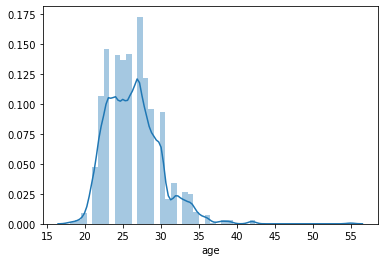

In [448]:
# age distribution of participants
sns.distplot(df['age'])

How many people made decision on night?

In [449]:
df['dec_made']=df['dec'].apply(lambda x: "Made a decision" if x==1 
                                             else "No decision")
df['dec_of_partner']=df['dec_o'].apply(lambda x: "Made a decision" if x==1 
                                             else "No decision")
df['match_or_not']=df['match'].apply(lambda x: "Match!" if x==1 
                                             else "No match")

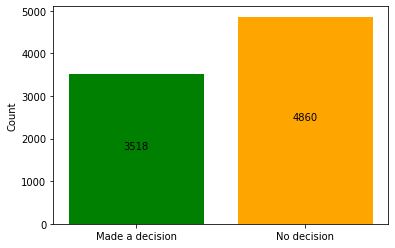

In [450]:
names=['Made a decision','No decision']
values=[df['dec_made'].value_counts()[1],df['dec_made'].value_counts()[0]]

plt.bar(names[0], values[0], color="green")
plt.bar(names[1], values[1], color="orange")

plt.ylabel("Count")

plt.text(0, values[0]/2,values[0], horizontalalignment='center')
plt.text(1, values[1]/2,values[1], horizontalalignment='center')
plt.show()

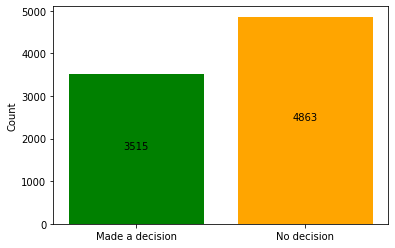

In [451]:
names=['Made a decision','No decision']
values=[df['dec_of_partner'].value_counts()[1],df['dec_of_partner'].value_counts()[0]]

plt.bar(names[0], values[0], color="green")
plt.bar(names[1], values[1], color="orange")

plt.ylabel("Count")

plt.text(0, values[0]/2,values[0], horizontalalignment='center')
plt.text(1, values[1]/2,values[1], horizontalalignment='center')
plt.show()

In [452]:
#how many match we have:
df['match'].value_counts()

0    6998
1    1380
Name: match, dtype: int64

In [453]:
#in percentage:
100*df['match'].value_counts()[1]/len(df['match'])

16.47171162568632

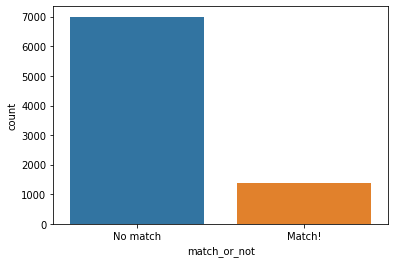

In [454]:
sns.countplot(x="match_or_not", data=df)

In [455]:
display(df['dec_made'].value_counts()[0])
display(df['dec_made'].value_counts()[1]-df['match'].value_counts()[1])
display(df['match'].value_counts()[1])

4860

2138

1380

Let's see how how people made decision and got a match!

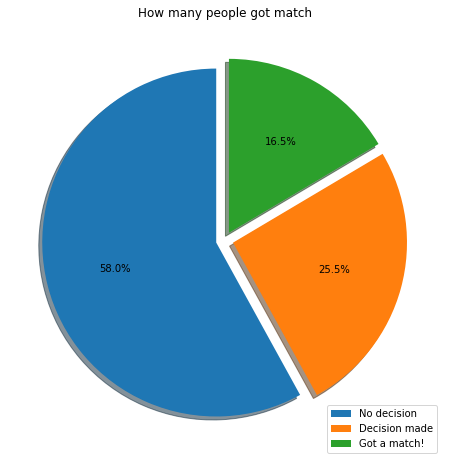

In [633]:
sizes=(df['dec_made'].value_counts()[0],df['dec_made'].value_counts()[1]-df['match'].value_counts()[1], df['match'].value_counts()[1])
explode=(0.05,0.05,0.05)

plt.figure(figsize=(8,8))
plt.pie(sizes, autopct='%1.1f%%', startangle=90,explode=explode, shadow=True)
plt.legend(["No decision", "Decision made", "Got a match!"])
plt.title("How many people got match")
plt.show()

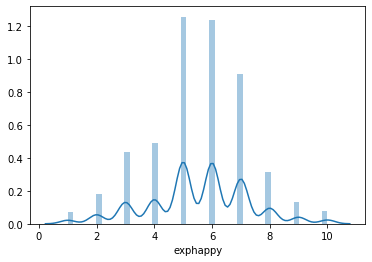

In [457]:
#How happy do you expect to be with the people you meet during the speed-dating event?
sns.distplot(df['exphappy'])

# Cleaning the data

In [458]:
# counting null values in column
null_column=df.isnull().sum().sort_values(ascending=False)
null_column

num_in_3          7710
numdat_3          6882
expnum            6578
amb7_2            6423
sinc7_2           6423
shar7_2           6404
attr7_2           6394
fun7_2            6394
intel7_2          6394
sinc7_3           6362
intel7_3          6362
fun7_3            6362
amb7_3            6362
shar7_3           6362
attr7_3           6362
amb5_3            6362
fun5_3            6362
intel5_3          6362
sinc5_3           6362
attr5_3           6362
shar2_3           6362
fun2_3            5419
amb2_3            5419
attr4_3           5419
sinc4_3           5419
intel4_3          5419
fun4_3            5419
amb4_3            5419
shar4_3           5419
attr2_3           5419
sinc2_3           5419
intel2_3          5419
mn_sat            5245
tuition           4795
intel1_3          4404
attr1_3           4404
fun1_3            4404
amb1_3            4404
date_3            4404
them_cal          4404
you_call          4404
amb3_3            4404
fun3_3            4404
intel3_3   

In [459]:
# narrowing dataset
df_1 = df.iloc[:, 11:28]
df_2 = df.iloc[:, 30:35]
df_3 = df.iloc[:, 39:43]
df_4 = df.iloc[:, 45:67]
df_5 = df.iloc[:, 69:74]
df_6 = df.iloc[:, 87:91]
df_7 = df.iloc[:, 97:102]
df_8 = df.iloc[:, 104:107]

df_n = pd.concat([df.iloc[:, 0],df.iloc[:, 2],df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8], axis=1)
df_n

,iid,gender,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,...,fun3_1,intel3_1,dec,attr,sinc,intel,fun,like,prob,met
0,1,0,11.0,0,0.14,0,27.0,2.0,35.0,20.0,...,8.0,8.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,1,0,12.0,0,0.54,0,22.0,2.0,60.0,0.0,...,8.0,8.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,1,0,13.0,1,0.16,1,22.0,4.0,19.0,18.0,...,8.0,8.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,1,0,14.0,1,0.61,0,23.0,2.0,30.0,5.0,...,8.0,8.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,1,0,15.0,1,0.21,0,24.0,3.0,30.0,10.0,...,8.0,8.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,526.0,0,0.64,0,26.0,3.0,10.0,10.0,...,6.0,7.0,0,3.0,5.0,5.0,5.0,2.0,5.0,0.0
8374,552,1,527.0,0,0.71,0,24.0,6.0,50.0,20.0,...,6.0,7.0,0,4.0,6.0,8.0,4.0,4.0,4.0,0.0
8375,552,1,528.0,0,-0.46,0,29.0,3.0,40.0,10.0,...,6.0,7.0,0,4.0,7.0,8.0,8.0,6.0,5.0,0.0
8376,552,1,529.0,0,0.62,0,22.0,4.0,10.0,25.0,...,6.0,7.0,0,4.0,6.0,5.0,4.0,5.0,5.0,0.0


In [460]:
# removing null rows now that the nulls are in the hundreds and not the thousands
df_new = df_n.dropna()

In [461]:
#checking if there is any Nan
df_new.isnull().any().sum()

0

In [462]:
#checking new data
df_new.shape

(6797, 67)

# See how people rate themselves VS hoz they rated by others

In [463]:
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'fun3_3', 'amb3_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3',
       'amb5_3', 'dec_made', 'dec_of_partner', 'match_or_not'],
      dtype='object', length=198)

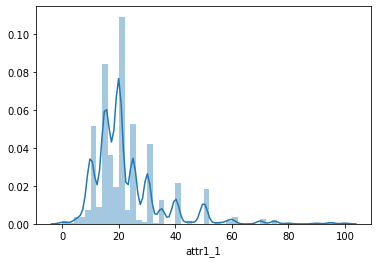

In [464]:
sns.distplot(df['attr1_1'])

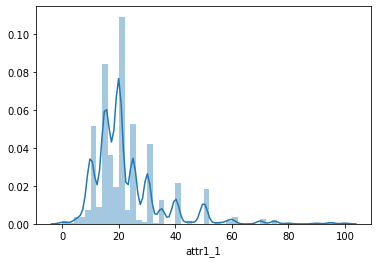

In [465]:
sns.distplot(df['attr1_1'])

In [466]:
df['attr'].max()

10.0

In [468]:
df["attr1_1"].mean()

22.514631883359332

In [469]:
df['attr']

0       6.0
1       7.0
2       5.0
3       7.0
4       5.0
       ... 
8373    3.0
8374    4.0
8375    4.0
8376    4.0
8377    3.0
Name: attr, Length: 8378, dtype: float64

Rate yourself VS  how do you think others perceive you? 


attr3_1 vs attr5_1

In [470]:
#Checking if thre is missing value:
display(df['attr3_1'].isnull().any().sum())
display(df['attr5_1'].isnull().any().sum())

1

1

In [471]:
df['shar'].mean()

5.474558883873615

In [472]:
df['attr_o'].mean()

6.190411462160177

In [473]:
categories = ['Attractive','Sincere','Intelligence','Funny', 'Ambition']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[df['attr3_1'].mean(), df['sinc3_1'].mean(), df['intel3_1'].mean(), df['fun3_1'].mean(), df['amb3_1'].mean()],
      theta=categories,
      fill='toself',
      name='How do you think about yourself?'
))
fig.add_trace(go.Scatterpolar(
      r=[df['attr5_1'].mean(), df['sinc5_1'].mean(), df['intel5_1'].mean(), df['fun5_1'].mean(), df['amb5_1'].mean()],
      theta=categories,
      fill='toself',
      name='How do you think others perceive you?'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=True
)

fig.show()

How do you think about yourself VS how people think about you?

attr3_1 VS attr_o

In [474]:
categories = ['Attractive','Sincere','Intelligence','Funny', 'Ambition']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[df['attr3_1'].mean(), df['sinc3_1'].mean(), df['intel3_1'].mean(), df['fun3_1'].mean(), df['amb3_1'].mean()],
      theta=categories,
      fill='toself',
      
      name='How do you think about yourself?'
))
fig.add_trace(go.Scatterpolar(
      r=[df['attr_o'].mean(), df['sinc_o'].mean(), df['intel_o'].mean(), df['fun_o'].mean(), df['amb_o'].mean()],
      theta=categories,
      fill='toself',
      name='How do you think others perceive you?'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 10]
    )),
  showlegend=True
)

fig.show()

# Who is interested in participating in this study?

In [475]:
df['field_cv_new']=df['field_cd'].apply(lambda x: "Law" if x==1
                                        else "Math" if x==2 
                                        else "Social Science, Psychologist" if x==3
                                        else "Medical Science, Pharmaceuticals, and Bio Tech" if x==4
                                        else "Engineering" if x==5
                                        else "English/Creative Writing/ Journalism" if x==6
                                        else "History/Religion/Philosophy" if x==7
                                        else "Business/Econ/Finance" if x==8
                                        else "Education, Academia" if x==9
                                        else "Biological Sciences/Chemistry/Physics" if x==10
                                        else "Social Work" if x==11
                                        else "Undergrad/undecided" if x==12
                                        else "Political Science/International Affairs" if x==13
                                        else "Film" if x==14
                                        else "Fine Arts/Arts Administration" if x==15
                                        else "Languages" if x==16
                                        else "Languages" if x==17
                                        else "Other" if x==18
                                        else "NAN")

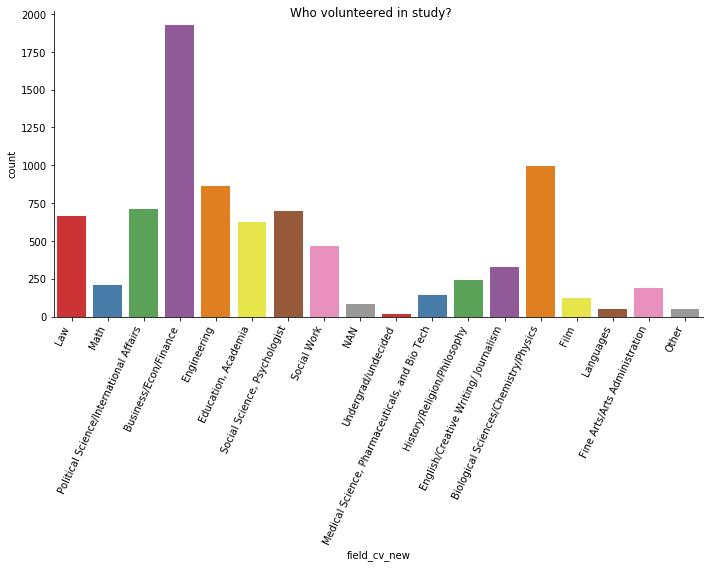

In [476]:
figure = sns.catplot(
    data=df,
    x='field_cv_new',
    kind='count',
    palette='Set1',
    aspect=2.0,
    legend="False"
)
figure.fig.suptitle('Who volunteered in study?')
figure.set_xticklabels(rotation=65, horizontalalignment='right')

# Who got matches? Group by majoring in

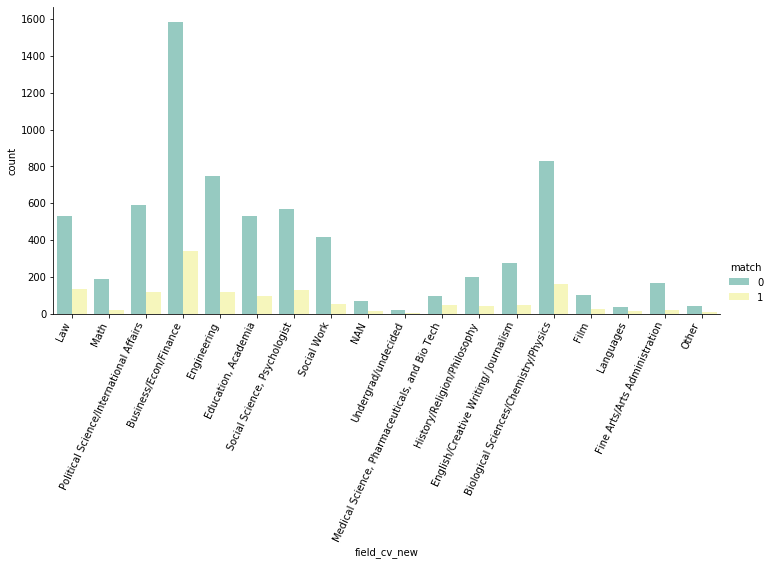

In [477]:
figure = sns.catplot(
    data=df,
    x='field_cv_new',
    hue='match',
    kind='count',
    palette='Set3',
    aspect=2.0,
    legend="False"
)
# figure.fig.suptitle('Who volunteered in study?')
figure.set_xticklabels(rotation=65, horizontalalignment='right')

# What is your primary goal in participating in this event? 




In [478]:
df['Main goal']=df['goal'].apply(lambda x: "Seemed like a fun night out" if x==1
                                        else "To meet new people" if x==2 
                                        else "To get a date" if x==3
                                        else "Looking for a serious relationship" if x==4
                                        else "To say I did it" if x==5
                                        else "Other" if x==6
                                        else "NAN")

In [479]:
df['Main goal'].value_counts()

Seemed like a fun night out           3426
To meet new people                    3012
To get a date                          631
To say I did it                        510
Other                                  419
Looking for a serious relationship     301
NAN                                     79
Name: Main goal, dtype: int64

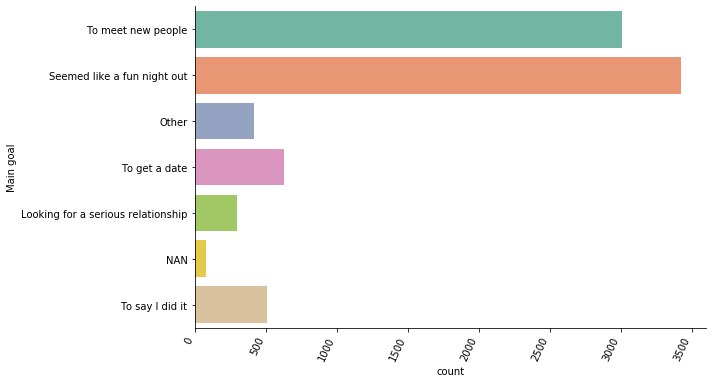

In [480]:
figure = sns.catplot(
    data=df,
    y='Main goal',
    kind='count',
#     hue='match',
    palette='Set2',
    aspect=2.0,
    legend="False"
)
# figure.fig.suptitle('What is your primary goal in participating in this event?')
figure.set_xticklabels(rotation=65, horizontalalignment='right')

In [481]:
df['exercise'].mean()

6.245812748523918

In [483]:
df[df['match']==1]['sports'].mean()

6.553113553113553

In [484]:
hobbies=[df[df['match']==1]['sports'].mean(),
         df[df['match']==1]['tvsports'].mean(),
         df[df['match']==1]['exercise'].mean(),
         df[df['match']==1]['dining'].mean(),
         df[df['match']==1]['museums'].mean(),
         df[df['match']==1]['art'].mean(),
         df[df['match']==1]['hiking'].mean(),
         df[df['match']==1]['gaming'].mean(),
         df[df['match']==1]['clubbing'].mean(),
         df[df['match']==1]['reading'].mean(),
         df[df['match']==1]['tv'].mean(),
         df[df['match']==1]['theater'].mean(),
         df[df['match']==1]['movies'].mean(),
         df[df['match']==1]['concerts'].mean(),
         df[df['match']==1]['music'].mean(),
         df[df['match']==1]['shopping'].mean(),
         df[df['match']==1]['yoga'].mean()]

In [485]:
hobbies

[6.553113553113553,
 4.547252747252747,
 6.297435897435897,
 7.917948717948718,
 7.054945054945055,
 6.875457875457876,
 5.876923076923077,
 3.9611721611721613,
 6.058608058608058,
 7.76996336996337,
 5.221245421245421,
 6.7765567765567765,
 7.831501831501831,
 6.956776556776557,
 7.9443223443223445,
 5.623443223443223,
 4.563369963369963]

Text(0, 0.5, 'Count')

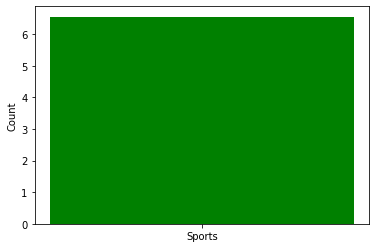

In [486]:
names=['Sports',
       'Tvsports',
       'Excersice',
       'Dining',
       'Museums',
       'Art',
       'Hiking',
       'Gaming',
       'Clubbing',
       'Reading',
       'Watching TV',
       'Theater',
       'Movies',
       'Going to concerts',
       'Music',
       'Shopping',
       'Yoga']

values=[6.553113553113553,
        4.547252747252747,
        6.297435897435897,
        7.917948717948718,
        7.054945054945055,
        6.875457875457876,
        5.876923076923077,
        3.9611721611721613,
        6.058608058608058,
        7.76996336996337,
        5.221245421245421,
        6.7765567765567765,
        7.831501831501831,
        6.956776556776557,
        7.9443223443223445,
        5.623443223443223,
        4.563369963369963]

plt.bar(names[0], values[0], color="green")

plt.ylabel("Count")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

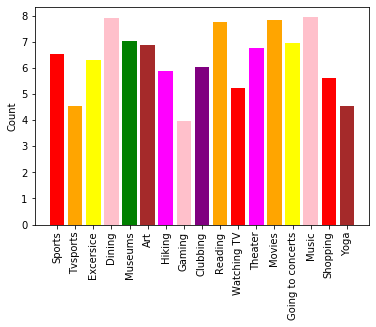

In [487]:
names=['Sports',
       'Tvsports',
       'Excersice',
       'Dining',
       'Museums',
       'Art',
       'Hiking',
       'Gaming',
       'Clubbing',
       'Reading',
       'Watching TV',
       'Theater',
       'Movies',
       'Going to concerts',
       'Music',
       'Shopping',
       'Yoga']

values=[6.553113553113553,
        4.547252747252747,
        6.297435897435897,
        7.917948717948718,
        7.054945054945055,
        6.875457875457876,
        5.876923076923077,
        3.9611721611721613,
        6.058608058608058,
        7.76996336996337,
        5.221245421245421,
        6.7765567765567765,
        7.831501831501831,
        6.956776556776557,
        7.9443223443223445,
        5.623443223443223,
        4.563369963369963]

plt.bar(names, values, color=('red','orange','yellow','pink','green','brown','magenta','pink','purple','orange','red','magenta','orange','yellow','pink','red','brown'))

plt.ylabel("Count")
plt.xticks(rotation='vertical')

# What you look for in the opposite sex?

In [524]:
df['attr7_3'].isnull().value_counts()

True     6362
False    2016
Name: attr7_3, dtype: int64

In [540]:
#men
option1 = ['1']
rslt_df1 = df[(df['dec'] == 1) & df['gender'].isin(option1)] 
rslt_df1['attr1_1']

116     60.0
117     60.0
118     60.0
120     19.0
121     19.0
        ... 
8360    70.0
8362    70.0
8363    70.0
8364    70.0
8371    70.0
Name: attr1_1, Length: 1989, dtype: float64

In [541]:
#women
option0 = ['0']
rslt_df0 = df[(df['dec'] == 1) & df['gender'].isin(option0)] 
rslt_df0['attr7_3']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
7885    15.0
7886    15.0
7887    15.0
7890    15.0
7893    15.0
Name: attr7_3, Length: 1529, dtype: float64

In [543]:
#For female participants:
#Male/Female’s Stated Interest Compared to Actual Influence on Decision

categories = ['Attractive','Sincere','Intelligence','Funny', 'Ambition', 'Interest']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[rslt_df0['attr1_1'].mean(),
         rslt_df0['sinc1_1'].mean(),
         rslt_df0['intel1_1'].mean(),
         rslt_df0['fun1_1'].mean(), 
         rslt_df0['amb3_1'].mean(), 
         rslt_df0['shar1_1'].mean()],
      theta=categories,
      fill='toself',
      
      name='Stated Interested before the event'
))
fig.add_trace(go.Scatterpolar(
      r=[rslt_df0['attr7_3'].mean(),
         rslt_df0['sinc7_3'].mean(),
         rslt_df0['intel7_3'].mean(),
         rslt_df0['fun7_3'].mean(), 
         rslt_df0['amb7_3'].mean(), 
         rslt_df0['shar7_3'].mean()],

      theta=categories,
      fill='toself',
    
      name='Actual decision(female)'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 40]
    )),
  showlegend=True
)

fig.show()

In [544]:
#For male participants:
#Male/Female’s Stated Interest Compared to Actual Influence on Decision

categories = ['Attractive','Sincere','Intelligence','Funny', 'Ambition', 'Interest']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[rslt_df1['attr1_1'].mean(),
         rslt_df1['sinc1_1'].mean(),
         rslt_df1['intel1_1'].mean(),
         rslt_df1['fun1_1'].mean(), 
         rslt_df1['amb3_1'].mean(), 
         rslt_df1['shar1_1'].mean()],
      theta=categories,
      fill='toself',
      
      name='Stated Interested before the event'
))
fig.add_trace(go.Scatterpolar(
      r=[rslt_df1['attr7_3'].mean(),
         rslt_df1['sinc7_3'].mean(),
         rslt_df1['intel7_3'].mean(),
         rslt_df1['fun7_3'].mean(), 
         rslt_df1['amb7_3'].mean(), 
         rslt_df1['shar7_3'].mean()],

      theta=categories,
      fill='toself',
    
      name='Actual decision(male)'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 40]
    )),
  showlegend=True
)

fig.show()

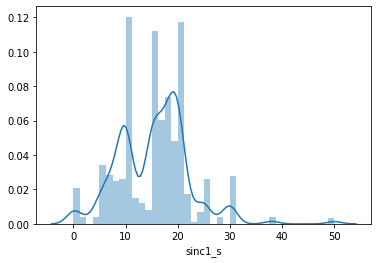

In [627]:
sns.distplot(df['sinc1_s'])

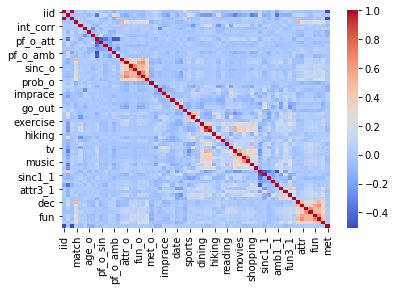

In [664]:
corr=df_n.corr()
sns.heatmap(corr, cmap='coolwarm')